In [1]:
pip install sktime


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install ipywidgets


Note: you may need to restart the kernel to use updated packages.


In [4]:
from sktime.datasets import load_airline
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.theta import ThetaForecaster
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
import pandas as pd
from sktime.utils.plotting import plot_series
import sys
from sklearn.metrics import mean_absolute_error, r2_score
from sktime.forecasting.arima import AutoARIMA
from sktime.forecasting.fbprophet import Prophet
import matplotlib.pyplot as plt
import numpy as np

sys.path.append("..")
import src.utility.plot_settings

(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='Number of airline passengers'>)

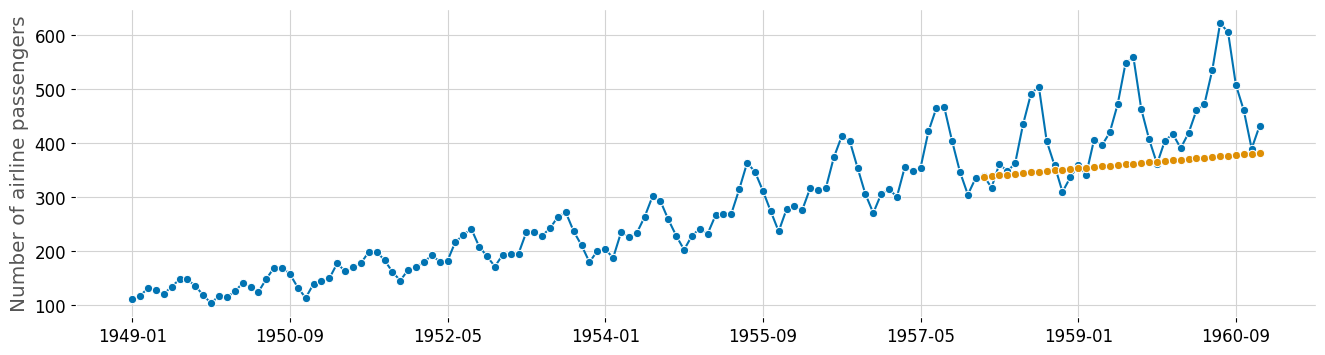

In [5]:

# https://www.sktime.org/en/stable/get_started.html

y = load_airline()
y_train, y_test = temporal_train_test_split(y)
fh = ForecastingHorizon(y_test.index, is_relative=False)
forecaster = ThetaForecaster(sp=1)  # monthly seasonal periodicity
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
mean_absolute_percentage_error(y_test, y_pred)
plot_series(y, y_pred)

In [6]:
import numpy as np

In [7]:
# https://www.kaggle.com/datasets/fedesoriano/traffic-prediction-dataset
biomass = pd.read_csv("data/raw/trail.csv")
''' skiprows = [x for x in range(2,2419)], usecols = [x for x in range(3,11)])'''
'''traffic = traffic.pivot(columns="Latitude", values="Vehicles")'''
biomass

FileNotFoundError: [Errno 2] No such file or directory: 'data/raw/trail.csv'

In [ ]:
def sktime_forecast(dataset, horizon, forecaster, validation=False, confidence=0.9, frequency="Y"):
    """Loop over a time series dataframe, train an sktime forecasting model, and visualize the results.

    Args:
        dataset (pd.DataFrame): Input time series DataFrame with datetime index
        horizon (int): Forecast horizon
        forecaster (sktime.forecasting): Configured forecaster
        validation (bool, optional): . Defaults to False.
        confidence (float, optional): Confidence level. Defaults to 0.9.
        frequency (str, optional): . Defaults to "D".
    """
    
    # Adjust frequency
    forecast_df = dataset.resample(rule=frequency,axis = 1).sum()

    # Interpolate missing periods (if any)
    forecast_df = forecast_df.interpolate(method="time")

    for col in dataset.rows:

        # Use train/test split to validate forecaster
        if validation:
            df = forecast_df[col]

            y_train = df[:-horizon]
            y_test = df.tail(horizon)

            forecaster.fit(y_train)
            fh = ForecastingHorizon(y_test.index, is_relative=False)
            y_pred = forecaster.predict(fh)
            ci = forecaster.predict_interval(fh, coverage=confidence).astype("float")
            y_true = df.tail(horizon)

            mae = mean_absolute_error(y_true, y_pred)

        # Make predictions beyond the dataset
        if not validation:
            df = forecast_df[col].dropna()
            forecaster.fit(df)

            last_date = df.index.max()
            fh = ForecastingHorizon(
                pd.date_range(str(last_date), periods=horizon, freq=frequency),
                is_relative=False,
            )

            y_pred = forecaster.predict(fh)
            ci = forecaster.predict_interval(fh, coverage=confidence).astype("float")
            mae = np.nan

        # Visualize results
        plt.plot(
            df.tail(horizon * 3),
            label="Actual",
            color="black",
        )
        plt.gca().fill_between(
            ci.index, (ci.iloc[:, 0]), (ci.iloc[:, 1]), color="b", alpha=0.1
        )
        plt.plot(y_pred, label="Predicted")
        # plt.title(
        #     f"{horizon} day forecast for {col} (mae: {round(mae, 2)}, confidence: {confidence*100}%)"
        # )
        plt.ylim(bottom=0)
        # plt.legend()
        plt.grid(False)
        plt.show()

: 

In [ ]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


: 

In [ ]:
forecaster = Prophet(yearly_seasonality=True)
sktime_forecast(dataset=biomass, horizon=3, forecaster=forecaster, validation=False)

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

: 

In [ ]:
forecaster = AutoARIMA(sp=1, suppress_warnings=True)
sktime_forecast(dataset=traffic, horizon=30, forecaster=forecaster, validation=False)

ModuleNotFoundError: AutoARIMA requires package 'pmdarima' to be present in the python environment, but 'pmdarima' was not found. 'pmdarima' is a soft dependency and not included in the base sktime installation. Please run: `pip install pmdarima` to install the pmdarima package. To install all soft dependencies, run: `pip install sktime[all_extras]`

: 

: 